# Lab 1 
### Marco Fernández Pérez

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Abrimos el archivo de datos Boston.xlsx

In [13]:
boston_houses = pd.read_excel('Boston.xlsx')

Vemos la información del conjunto de datos

In [14]:
boston_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [18]:
boston_houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [20]:
boston_houses.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

Podemos apreciar que **chas**, **rad** y **tax** son números enteros, mientas que el resto son números con decimales.

Además, el atributo **chas** solo puede tener valor 0 y 1, por lo tanto es dummy.

También, sabemos que no hay ningún nulo.

## Meaning of the attributes

|**Attribute**|**Meaning**|**Significado**|
|---|---|---|
|**crim**|Per capita crime rate by town|Tasa de criminalidad per cápita por ciudad|
|**zn**|Proportion of residential land zoned for lots over 25,000 sq.ft.|Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados|
|**indus**|Proportion of non-retail business acres per town|Proporción de acres (terreno) dedicados a negocios no minoristas por ciudad|
|**chas**|Charles River dummy variable (1 if track bounds river; 0 otherwise)|Variable ficticia (dummy) del río Charles (1 si la zona limita con el río; 0 en caso contrario)|
|**nox**|Nitric oxides concentration (parts per 10 million)|Concentración de óxidos nítricos (partes por 10 millones)|
|**rm**|Average number of rooms per dwelling|Número medio de habitaciones por vivienda|
|**age**|Proportion of owner-occupied units built prior to 1940|Proporción de viviendas ocupadas por sus propietarios construidas antes de 1940|
|**dis**|Weighted distances to five Boston employment centres|Distancias ponderadas a cinco centros de empleo de Boston|
|**rad**|Index of accessibility to radial highways|Índice de accesibilidad a autopistas radiales|
|**tax**|Full-value propertiy-tax rate per $10,000|Tasa de impuesto sobre la propiedad (valor total) por cada $10,000|
|**ptratio**|Per capita crime rate by town|Ratio de alumnos por profesor por ciudad|
|**lstat**|% lower status of the population|Porcentaje de población de estatus socioeconómico bajo|
|---|---||
|**medv**|Median value of owner-occupied homes in $1000s (This is the "price" attribute)|Valor mediano de las viviendas ocupadas por sus propietarios|

In [15]:
boston_houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [16]:
corr_matrix = boston_houses.corr()

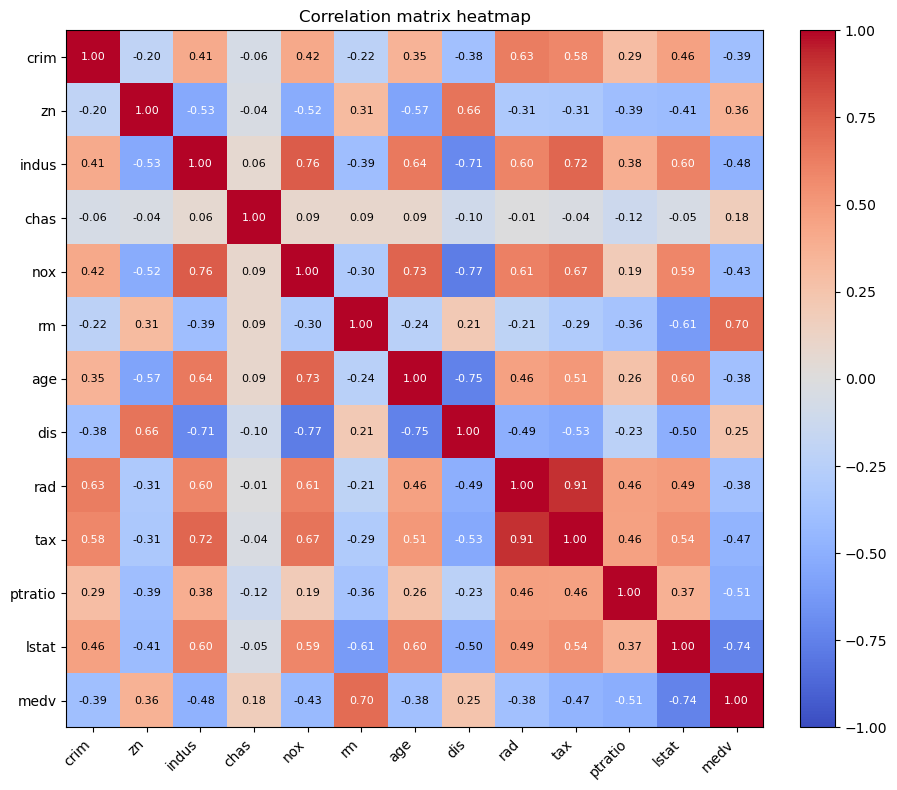

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='equal')

# ticks and labels
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)

# annotate cells with correlation values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        val = corr_matrix.iat[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(j, i, f"{val:.2f}", ha="center", va="center", color=color, fontsize=8)

fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Correlation matrix heatmap")
plt.tight_layout()
plt.show()

Observamos en la matriz de correlación que los atributos **rad** y **tax** están muy correlacionados (0.91), así que uno de ellos no será usado para la regresión lineal. Para elegir cual se descarta, comparamos los valores de correlación entre esos atributos y el objetivo **medv**. **rad** tiene un -0.38 y **tax** tiene un -0.47, por tanto, se descarta **rad**.

In [22]:
X = boston_houses.drop(columns=['medv', 'rad'])
y = boston_houses['medv']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 11), (102, 11), (404, 1), (102, 1))

In [25]:
X_train_unos = sm.add_constant(X_train)

In [26]:
X_train_unos.head(3)

,const,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,lstat
221,1.0,0.40771,0.0,6.2,1,0.507,6.164,91.3,3.0480,307,17.4,21.46
375,1.0,19.60910,0.0,18.1,0,0.671,7.313,97.9,1.3163,666,20.2,13.44
450,1.0,6.71772,0.0,18.1,0,0.713,6.749,92.6,2.3236,666,20.2,17.44
